## 1. Introduction
<p>In this project, I will analyze a dataset on every single lego block that has been built</p>


In [1]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>I am going to start by reading in the colors data.</p>

## 3. Exploring Colors
<p>In this section I am going to see the number of colors available in this database.</p>

In [2]:
# number of distinct colors available.
num_colors = colors[['name']].name.nunique()
print(num_colors)

135


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. I'm going to compare whether a color is transparent or non-transparent.</p>

In [3]:
# group colors based on transparency
colors_transparent = colors.groupby('is_trans').count()
print(colors_transparent)

           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p>I am going to use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

  set_num                        name  year  theme_id  num_parts
0    00-1             Weetabix Castle  1970       414        471
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          2
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12


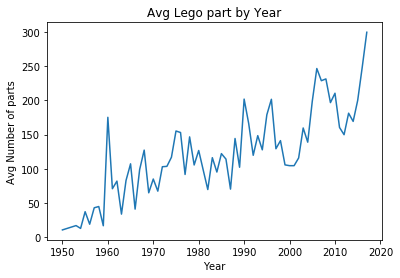

In [4]:
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')
print(sets.head())

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets[['year','num_parts']].groupby('year', as_index = False).mean().round(2)

# Plot trends in average number of parts by year
import matplotlib.pyplot as plt
plt.plot('year','num_parts', data = parts_by_year)
plt.xlabel('Year')
plt.ylabel('Avg Number of parts')
plt.title('Avg Lego part by Year')
plt.show()


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple themes. I am going to see how the number of themes shipped has varied over the years.</p>

In [5]:
%matplotlib inline
# Number of themes shipped by last 5 years
themes_by_year = sets[['year', 'theme_id']].groupby('year').theme_id.nunique()
print(themes_by_year.tail(5))


year
2013    93
2014    92
2015    99
2016    88
2017    78
Name: theme_id, dtype: int64


## End of Project!
